In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing

In [16]:
# loading the csv data to a pandas Dataframe
gold_data = pd.read_csv('/content/csv .file')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 17: invalid start byte

In [19]:
# loading the csv data to a pandas Dataframe
gold_data = pd.read_csv('/content/archive (1).zip', encoding='latin-1') # Try 'latin-1' encoding

In [20]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [23]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [24]:
# getting some basic inforation the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [25]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [26]:
# getting the stastical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1.positive Correlation
2. Negative correlation


In [30]:
correlation = gold_data.corr()

ValueError: could not convert string to float: '1/2/2008'

In [31]:
import pandas as pd

# Assuming 'gold_data' is your DataFrame
# Convert the date column (assuming it's named 'Date') to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features from the date (e.g., day, month, year)
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

# Now you can calculate correlations on the numerical columns
correlation = gold_data.corr()
print(correlation)

             Date       SPX       GLD       USO       SLV   EUR/USD       Day  \
Date     1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540  0.002244   
SPX      0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017 -0.001525   
GLD      0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375 -0.000198   
USO     -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317 -0.007988   
SLV     -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631 -0.000206   
EUR/USD -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000  0.002122   
Day      0.002244 -0.001525 -0.000198 -0.007988 -0.000206  0.002122  1.000000   
Month    0.029181 -0.023432  0.020494 -0.047335 -0.011976 -0.012100  0.005550   
Year     0.994957  0.944403  0.206654 -0.775765 -0.172485 -0.791655 -0.006307   

            Month      Year  
Date     0.029181  0.994957  
SPX     -0.023432  0.944403  
GLD      0.020494  0.206654  
USO     -0.047335 -0.775765  
SLV     -0.011976 -0.172485  
EUR/USD -

In [32]:
correlation = gold_data.corr()

<Axes: >

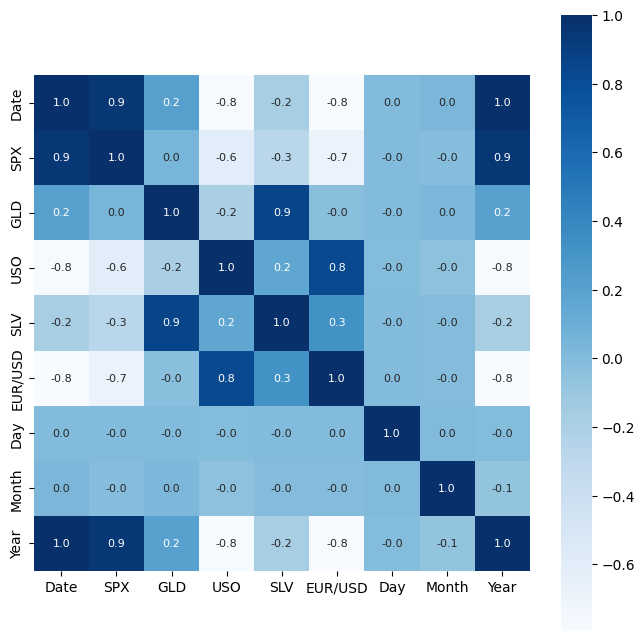

In [33]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [34]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Day       -0.000198
Month      0.020494
Year       0.206654
Name: GLD, dtype: float64


<ipython-input-35-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

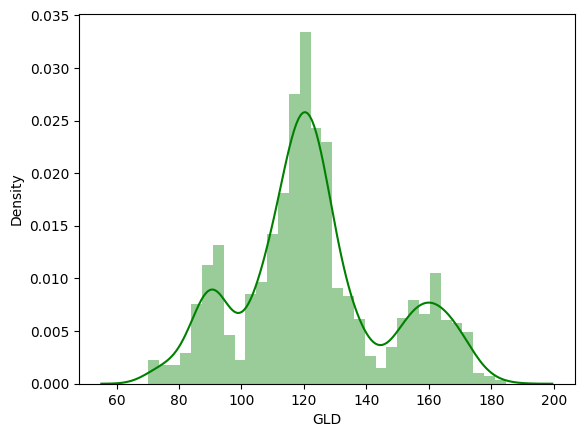

In [35]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [36]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD  Day  Month  Year
0     1447.160034  78.470001  15.1800  1.471692    2      1  2008
1     1447.160034  78.370003  15.2850  1.474491    3      1  2008
2     1411.630005  77.309998  15.1670  1.475492    4      1  2008
3     1416.180054  75.500000  15.0530  1.468299    7      1  2008
4     1390.189941  76.059998  15.5900  1.557099    8      1  2008
...           ...        ...      ...       ...  ...    ...   ...
2285  2671.919922  14.060000  15.5100  1.186789    8      5  2018
2286  2697.790039  14.370000  15.5300  1.184722    9      5  2018
2287  2723.070068  14.410000  15.7400  1.191753   10      5  2018
2288  2730.129883  14.380000  15.5600  1.193118   14      5  2018
2289  2725.780029  14.405800  15.4542  1.182033   16      5  2018

[2290 rows x 7 columns]


In [38]:
print(Y)


0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [41]:
regressor = RandomForestRegressor(n_estimators=100)

In [42]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [43]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [44]:
print(test_data_prediction)

[168.19919869  82.92199978 116.21650088 127.61300087 120.09820097
 154.64939887 150.34709954 126.19140043 117.75939877 126.03490074
 115.37570177 170.04770095 140.68899847 167.84359728 115.16980033
 117.41860056 134.49460188 171.1656026  160.07290332 172.3998998
 154.93440036 124.25040044 174.00800075 157.07480271 125.24400072
  93.549199    76.94999995 119.30190045 119.00769886 167.31499865
  88.0597009  125.31960021  91.38840027 117.49299992 121.11119989
 136.35790091 116.09710036 113.83030055 141.97889983 107.33710048
 105.6272026   87.0508976  126.53600111 117.88310059 155.04749931
 120.17249915 108.58439978 108.06059777  92.85220028 127.16859723
  76.01739982 114.14790044 120.83439974 111.16619895 118.78699884
 121.00989915 160.27750177 174.98310034 146.48759628  86.69729963
  93.37360018  87.18289857  89.77080018 119.04440089 126.41450079
 127.77769949 171.73520128 122.26739936 117.56099886  97.72659975
 168.27260113 142.28229807 131.97080135 120.95970112 123.79509928
 119.647501

In [45]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9952222491846967


Compare the Actual Values and Predicted Values in a Plot

In [46]:
Y_test = list(Y_test)

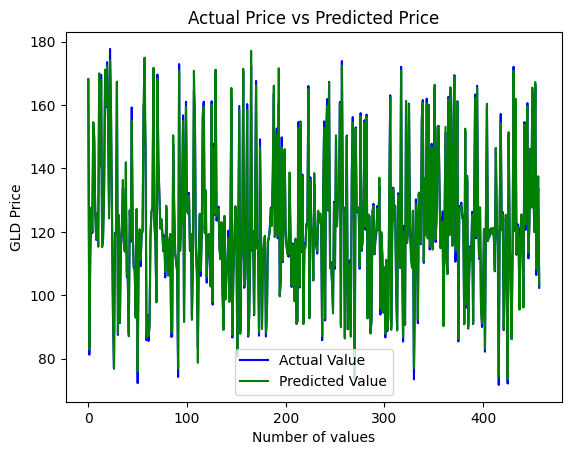

In [48]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()